In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
#对GPU使用模式进行设置，使其允许内存增长，在程序允许时，根据需要为TensorFlow进程分配GPU显存
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) 

In [3]:
mnist = tf.keras.datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [4]:
X_train, X_test = tf.cast(train_x/255.0, tf.float32), tf.cast(test_x/255.0, tf.float32)
y_train, y_test = tf.cast(train_y, tf.int16), tf.cast(test_y, tf.int16)

In [5]:
model = tf.keras.models.load_model("mnist_model.h5")

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0852 - sparse_categorical_accuracy: 0.9737


[0.08523464947938919, 0.9736999869346619]

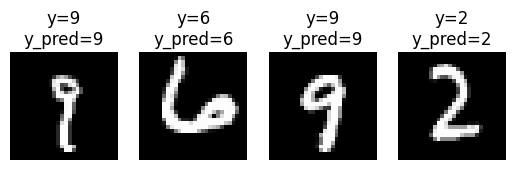

In [8]:
for i in range(4):
    num = np.random.randint(1, 10000)
    
    plt.subplot(1, 4, i + 1)
    plt.axis("off")
    plt.imshow(test_x[num], cmap='gray')
    y_pred=np.argmax(model.predict(tf.constant(X_test[num].numpy().reshape(1,28,28))))
    title="y="+str(test_y[num])+"\ny_pred="+str(y_pred)
    plt.title(title)
plt.show()